## 📝 Task
Analyze the “Top 50 Fast‑Food Chains in USA” dataset, load and clean the data, engineer key metrics, explore summary statistics and correlations, visualize distributions and category leaders, and build a linear regression model to predict systemwide sales from store count.

## 🛠️ Tools used
- **Language:** Python  
- **Data Wrangling:** Pandas  
- **Visualization:** Matplotlib, Seaborn  
- **Modeling:** Scikit‑learn (LinearRegression)  
- **Environment:** Jupyter Notebook 

## 🎯 Objective 1: Data Ingestion & Cleaning 
- Load & preview the raw CSV
- Correct column names 
- Rename for readability
- Handle missing values
- Present cleaned data

In [1]:
# Objective 1: Data Ingestion & Cleaning

# Import pandas
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv('Top 50 Fast-Food Chains in USA.csv')

# Standardize column names: lowercase, replace non‑alphanumerics with underscores, strip trailing underscores
df.columns = (
    df.columns
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)

# Rename columns for readability
df = df.rename(columns={
    'fast_food_chains':              'brand',
    'u_s_systemwide_sales_millions_u_s_dollars': 'systemwide_sales_millions',
    'average_sales_per_unit_thousands_u_s_dollars': 'avg_sales_per_unit_thousands',
    'franchised_stores':             'franchised_stores',
    'company_stores':                'company_stores',
    '2021_total_units':              'total_units',
    'total_change_in_units_from_2020':'change_units'
})

# Inspect for missing values or anomalies
print(df.isna().sum())

# Quick peek at cleaned data
df.head(10)

brand                           0
systemwide_sales_millions       0
avg_sales_per_unit_thousands    0
franchised_stores               0
company_stores                  0
total_units                     0
change_units                    0
dtype: int64


,brand,systemwide_sales_millions,avg_sales_per_unit_thousands,franchised_stores,company_stores,total_units,change_units
0,Arby’s,4462,1309,2293,1116,3409,40
1,Baskin-Robbins,686,296,2317,0,2317,102
2,Bojangles,1485,1924,496,277,773,15
3,Burger King,10033,1470,7054,51,7105,24
4,Carl’s Jr.,1560,1400,1011,47,1058,-21
5,Checkers/Rally’s,931,1145,568,266,834,-13
6,Chick-fil-A,16700,6100,2650,82,2732,155
7,Chipotle,7547,2641,0,2966,2966,198
8,Church’s Chicken,776,870,731,161,892,-13
9,Culver’s,2489,3099,831,6,837,55


## 🎯 Objective 2: Exploratory Data Analysis
- Plot a correlation heatmap
- Histogram of average sales per unit with mean

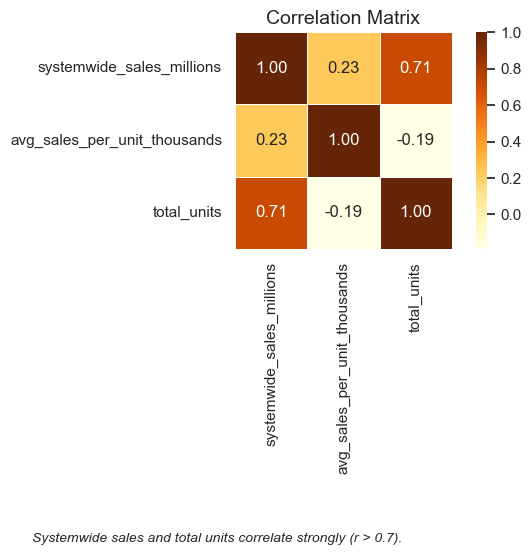

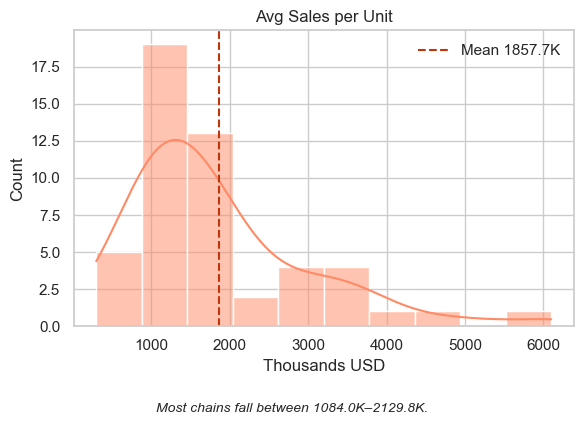

In [25]:
# Objective 2: Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
fig, ax = plt.subplots(figsize=(7,5))
corr = df[['systemwide_sales_millions',
           'avg_sales_per_unit_thousands',
           'total_units']].corr()
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="YlOrBr",
    square=True, linewidths=0.5, linecolor="white",
    annot_kws={"size":12}, ax=ax
)
ax.set_title("Correlation Matrix", fontsize=14)
fig.text(0.5, -0.10,
         "Systemwide sales and total units correlate strongly (r > 0.7).",
         ha='center', fontsize=10, style='italic')
fig.tight_layout()
plt.show()

# Histogram of Avg Sales per Unit
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(
    df['avg_sales_per_unit_thousands'],
    bins=10, kde=True, color="#FF8A65", edgecolor="white", ax=ax
)
mean = df['avg_sales_per_unit_thousands'].mean()
ax.axvline(mean, color="#BF360C", linestyle="--", label=f"Mean {mean:.1f}K")
ax.set(title="Avg Sales per Unit", xlabel="Thousands USD")
ax.legend(frameon=False)
fig.text(0.5, -0.05,
         f"Most chains fall between {df['avg_sales_per_unit_thousands'].quantile(0.25):.1f}K–"
         f"{df['avg_sales_per_unit_thousands'].quantile(0.75):.1f}K.",
         ha='center', style='italic', fontsize=10)
fig.tight_layout()
plt.show()

## 🎯 Objective 3: Exploratory Data Analysis
- Map brands into a food category (burger, chicken, coffee, pizza)
- Plot a gradient bar chart with top 10 chains by systemwide sales
- Plot a segmented bar chart with Top 5 chains within each category

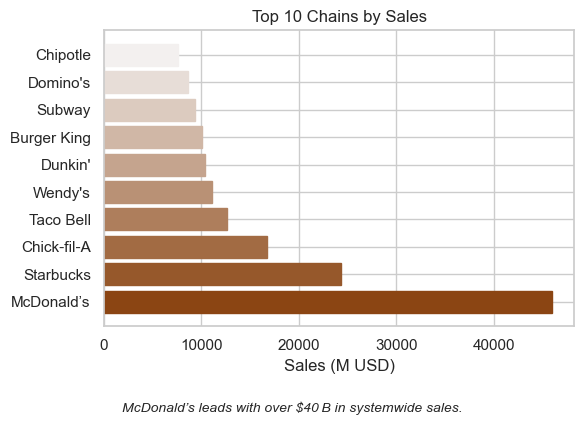

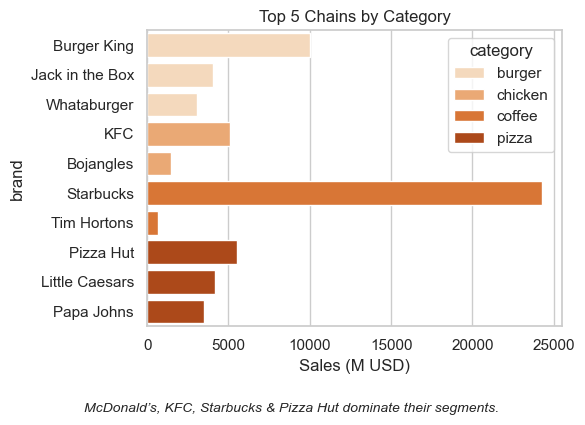

In [7]:
# Objective 3: Category Deep‑Dive

import seaborn as sns
import matplotlib.pyplot as plt

# Category mapping of food brands
cats = {
    'burger':  ['mcdonalds','burger_king','wendys','hardees','carls_jr','whataburger','jack_in_the_box','culvers','smashburger'],
    'chicken': ['kfc','chick_fila','popeyes','raising_canes','churchs_chicken','bojangles'],
    'coffee':  ['starbucks','dunkin','tim_hortons'],
    'pizza':   ['pizza_hut','dominos','papa_johns','little_caesars']
}
mp = {b:cat for cat, lst in cats.items() for b in lst}
df['category'] = (
    df['brand']
      .str.lower()
      .str.replace(r'[^a-z0-9]+','_',regex=True)
      .map(mp)
      .fillna('other')
)

sns.set_theme(style="whitegrid", palette="YlOrBr")

# Top 10 Chains by Sales with a gradient bar chart
t10 = df.nlargest(10, 'systemwide_sales_millions')
fig, ax = plt.subplots(figsize=(6,4))
colors = sns.light_palette("#8B4513", n_colors=len(t10), reverse=True)
ax.barh(t10['brand'], t10['systemwide_sales_millions'], color=colors, edgecolor=colors)
ax.set(xlabel="Sales (M USD)", title="Top 10 Chains by Sales")
fig.text(0.5, -0.05, "McDonald’s leads with over $40 B in systemwide sales.", ha='center', style='italic', fontsize=10)
plt.tight_layout()
plt.show()

# Top 5 Chains by Category with a segmented bar chart
t5 = (
    df[df['category']!='other']
      .sort_values(['category','systemwide_sales_millions'], ascending=[True, False])
      .groupby('category')
      .head(5)
)
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=t5, x='systemwide_sales_millions', y='brand', hue='category', dodge=False, palette='Oranges', ax=ax)
ax.set(xlabel="Sales (M USD)", title="Top 5 Chains by Category")
fig.text(0.5, -0.05, "McDonald’s, KFC, Starbucks & Pizza Hut dominate their segments.", ha='center', style='italic', fontsize=10)
plt.tight_layout()
plt.show()

## 🎯 Objective 4: Predictive Modeling (Linear Regression)¶
- Fit a linear regression to predict systemwide sales from total store count
- Scatter plot with regression line of Sales vs. Store Count relationship
- Report the model intercept, slope (USD per additional store), and R² (variance explained)
- Extend to a multivariate regression adding average sales per unit as a predictor
- Print and interpret each feature’s coefficient and the improved R²
- Plot actual vs. predicted sales to assess the multivariate model’s fit

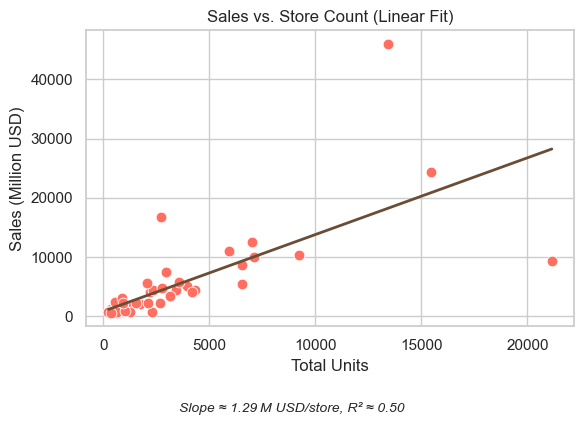

Multivariate Regression Performance
  • Intercept: -4093.12 M USD
  • Coef (total_units): 1.4242 M USD per unit
  • Coef (avg_sales_per_unit_thousands): 2.4479 M USD per unit
  • R²:       0.640


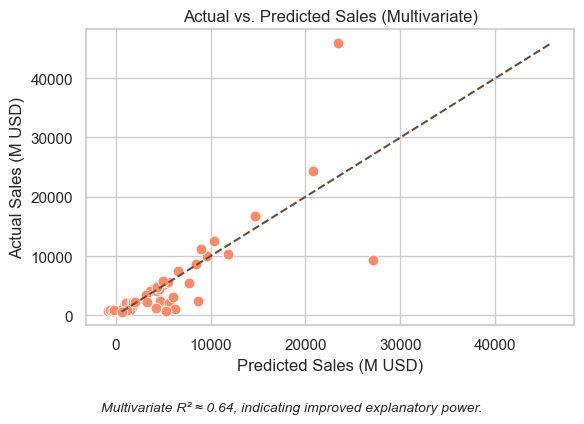

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a simple linear regression: sales as a function of store count
X = df[['total_units']]
y = df['systemwide_sales_millions']
model = LinearRegression().fit(X, y)
intercept, slope, r2 = model.intercept_, model.coef_[0], model.score(X, y)

# Scatter plot with regression line to show Sales vs. Store Count relationship
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(
    x='total_units', y='systemwide_sales_millions', data=df,
    color='#FF6F61', edgecolor='white', s=60, ax=ax
)
sns.lineplot(
    x=df['total_units'], y=model.predict(X),
    color='#6B4C35', linewidth=2, ax=ax
)
ax.set(
    title='Sales vs. Store Count (Linear Fit)',
    xlabel='Total Units',
    ylabel='Sales (Million USD)'
)
fig.text(
    0.5, -0.05,
    f"Slope ≈ {slope:.2f} M USD/store, R² ≈ {r2:.2f}",
    ha='center', fontsize=10, style='italic'
)
fig.tight_layout()
plt.show()

# Prepare data for multivariate regression: include avg sales per unit
X_multi = df[['total_units', 'avg_sales_per_unit_thousands']]
y = df['systemwide_sales_millions']
multi_model = LinearRegression().fit(X_multi, y)
intercept_m, coefs = multi_model.intercept_, dict(zip(X_multi.columns, multi_model.coef_))
r2_multi = multi_model.score(X_multi, y)

# Print intercept, coefficients, and overall R²
print("Multivariate Regression Performance")
print(f"  • Intercept: {intercept_m:.2f} M USD")
for feature, coef in coefs.items():
    print(f"  • Coef ({feature}): {coef:.4f} M USD per unit")
print(f"  • R\u00b2:       {r2_multi:.3f}")

# Plot Actual vs. Predicted sales to evaluate model performance
y_pred = multi_model.predict(X_multi)
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x=y_pred, y=y, color="#FF8A65", edgecolor="white", s=60, ax=ax)
ax.plot([y.min(), y.max()], [y.min(), y.max()], color="#6B4C35", linestyle="--")
ax.set(
    title='Actual vs. Predicted Sales (Multivariate)',
    xlabel='Predicted Sales (M USD)',
    ylabel='Actual Sales (M USD)'
)
fig.text(
    0.5, -0.05,
    f"Multivariate R² ≈ {r2_multi:.2f}, indicating improved explanatory power.",
    ha='center', fontsize=10, style='italic'
)
fig.tight_layout()
plt.show()


## ✔️Results
#### Top 10 by 2021 systemwide sales (in Millions USD):
- McDonald’s   45,960 
- Starbucks   24,300
- Chick‑fil‑A   16,700
- Taco Bell   12,600
- Wendy’s   11,111
- Dunkin’   10,416
- Burger   King 10,033
- Subway   9,350
- Domino’s   8,641
- Chipotle   7,547

##### Store Count vs. Total Sales
Correlation (r) = 0.71
Each additional store adds about $1.29 M in annual sales on average.

##### Average Sales per Store

Mean = $1.86 M (right‑skewed).

Total sales (r = 0.23), so footprint beats per‑unit efficiency.

#### Category Insights (Mean Systemwide Sales)

- Coffee: $12.49 B
- Burgers: $5.73 B
- Pizza: $4.39 B
- Chicken: $3.29 B
- Others: $4.66 B

#### Top 5 by category:

##### Burgers:
McDonald’s, Wendy’s, Burger King, Jack in the Box, Whataburger

##### Chicken:
KFC, Raising Cane’s, Bojangles, Church’s Chicken

##### Coffee: 
Starbucks, Dunkin’, Tim Hortons

##### Pizza: 
Domino’s, Pizza Hut, Little Caesars, Papa John’s

#### Simple Linear Regression:
#### Sales
=
$
865.3
M
+
$
1.294
M
×
Store Count
Sales=$865.3M+$1.294M×Store Count
𝑅
2
≈
0.50
R 
2
 ≈0.50 (store count explains ~50% of sales variance)

#### Multivariate Regression upgrade:

Model: Sales = –$4,093 M + $1.424 M × Stores + $2.448 M × (Avg Sales in thousands)

R²≈0.64 → adds ~14 pp of explanatory power, so both footprint and per‑unit efficiency matter

#### Fit check: 
Actual vs. predicted shows tighter clustering in mid‑range but under/over‑estimation at extremes